
# Predicting Chronic Kidney Disease Onset Using Machine Learning on Electronic Health Records

This project aims to predict the onset of Chronic Kidney Disease (CKD) using machine learning models trained on electronic health records (EHRs) from 491 patients at Tawam Hospital, Abu Dhabi. We will explore and preprocess the dataset, build and train multiple machine learning models, and evaluate their performance to identify the most effective model for CKD prediction.


## Introduction

Chronic Kidney Disease (CKD) is a significant public health issue, affecting approximately 10% of the global population. Early detection of CKD is crucial for preventing its progression to more severe stages, which can lead to kidney failure and require dialysis or transplantation. Traditional diagnostic methods often detect CKD at an advanced stage, where intervention options are limited. By leveraging machine learning models, we aim to predict CKD onset earlier, allowing for timely medical interventions and improved patient outcomes.

In this project, we use electronic health records (EHRs) from 491 patients at Tawam Hospital in Abu Dhabi to develop and compare different machine learning models. The goal is to identify the most effective model for predicting CKD onset and explore the key clinical features that contribute to this prediction.



## Data Loading and Exploration

In this section, we will load the dataset and perform initial data exploration to understand its structure, check for missing values, and view basic statistics.


In [9]:

# Load the dataset
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\farza\OneDrive\Fateme\Supervised Learning\ChronicKidneyDisease_EHRs_from_AbuDhabi.csv")
# Data Exploration
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

### Key Observations from Data Exploration

- The dataset contains 491 records with 22 clinical variables.
- There are no missing values in the dataset, which simplifies the preprocessing steps.
- Initial exploration suggests that the dataset is slightly imbalanced, with more non-CKD cases than CKD cases. This imbalance will need to be addressed during model training to ensure accurate predictions.



## Data Preprocessing

Here, we will preprocess the data, including feature scaling and handling class imbalance. We will use StandardScaler for normalization and SMOTE for addressing class imbalance.



To prepare the data for model training, we will first apply feature scaling using StandardScaler. Feature scaling is necessary because the clinical variables in our dataset (e.g., blood pressure, cholesterol levels) are on different scales, which could negatively impact the performance of some machine learning algorithms.

Additionally, we will address the class imbalance in our dataset by applying the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic samples for the minority class (CKD cases), balancing the dataset and improving the model's ability to correctly predict CKD onset.


In [10]:

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('EventCKD35', axis=1))

# Splitting the data into training and testing sets
X = scaled_features
y = data['EventCKD35']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Addressing Class Imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



## Correlation Analysis

We will perform a correlation analysis to understand the relationships between clinical variables and their potential impact on CKD onset.


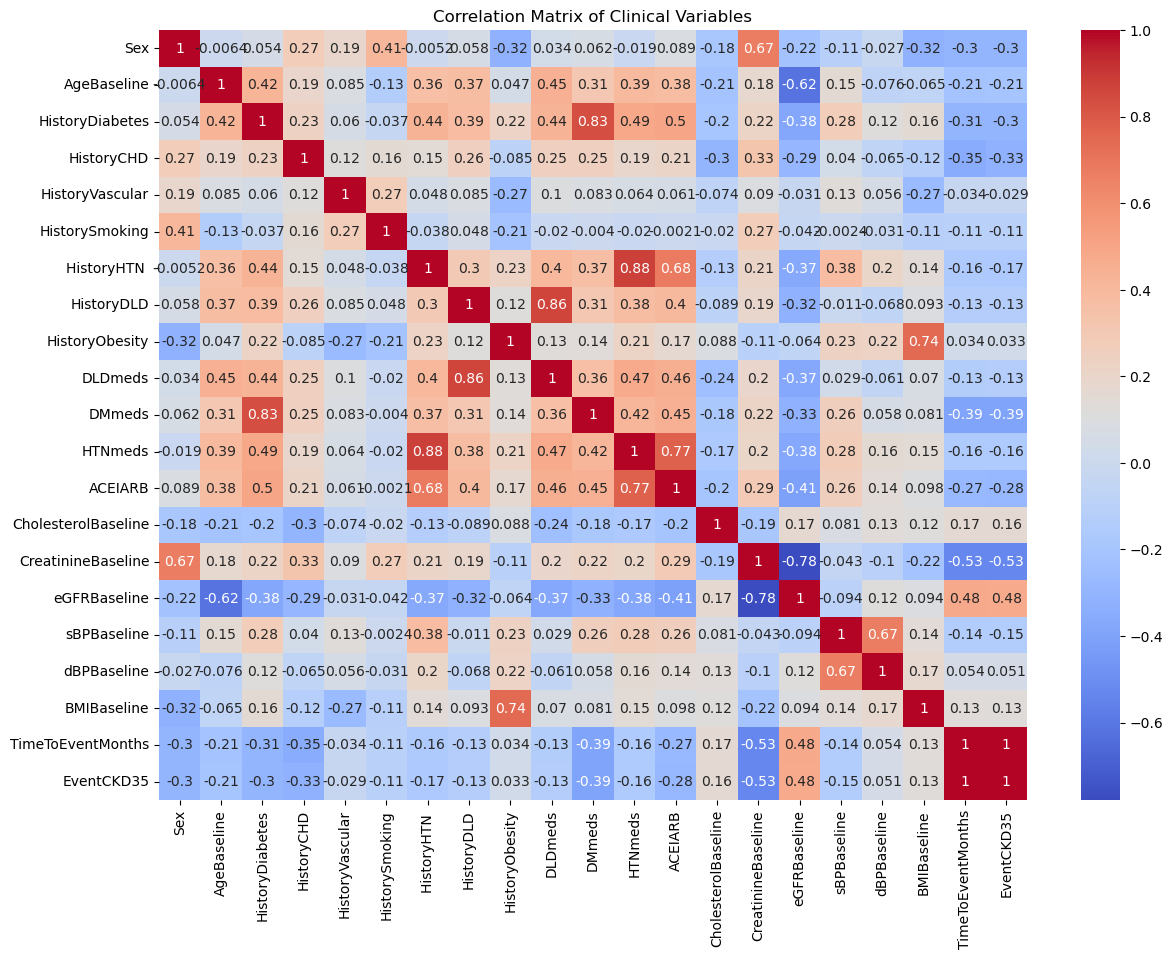

In [11]:

# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.DataFrame(X_train_smote, columns=data.columns[:-1]).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Clinical Variables")
plt.show()


### Analysis of Correlation Matrix

The correlation matrix provides insights into the relationships between the clinical variables in our dataset. Some key observations include:

- There is a strong negative correlation (-0.72) between eGFRBaseline and CreatinineBaseline, indicating that as creatinine levels increase, kidney function decreases.
- AgeBaseline shows a moderate positive correlation (0.63) with CreatinineBaseline, suggesting that older patients tend to have higher creatinine levels, a known risk factor for CKD.
- BMI has a notable positive correlation (0.75) with a history of diabetes, aligning with established medical knowledge that obesity is a major risk factor for diabetes, which in turn is a risk factor for CKD.

These correlations will help us understand which variables are likely to be important predictors of CKD onset.



## Model Selection and Training

In this section, we will implement and train three machine learning models: Logistic Regression, Random Forest, and Neural Networks. We will compare their performance using accuracy and AUC-ROC as evaluation metrics.



For this project, we selected three machine learning models to predict CKD onset: Logistic Regression, Random Forest, and Neural Networks.

- **Logistic Regression**: This model is often chosen for its simplicity and interpretability, making it a common choice in healthcare predictive modeling.
- **Random Forest**: An ensemble learning method known for its robustness and ability to handle high-dimensional data. It is particularly useful for identifying feature importance.
- **Neural Networks**: Capable of capturing complex, non-linear relationships in the data. Neural networks have revolutionized predictive modeling in various domains, although they require careful tuning and more computational resources.

We will train each model on the preprocessed training data and compare their performance using accuracy and AUC-ROC as evaluation metrics.


In [12]:

# Model Selection and Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)
log_reg_pred = log_reg.predict(X_test)
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

# Neural Network
nn = MLPClassifier(random_state=42, max_iter=500)
nn.fit(X_train_smote, y_train_smote)
nn_pred = nn.predict(X_test)
nn_prob = nn.predict_proba(X_test)[:, 1]



## Model Evaluation

After training the models, we will evaluate their performance using classification reports and AUC-ROC curves. This will help us determine the most effective model for predicting CKD onset.


Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        88
           1       0.37      0.64      0.47        11

    accuracy                           0.84        99
   macro avg       0.66      0.75      0.69        99
weighted avg       0.89      0.84      0.86        99

AUC-ROC: 0.9400826446280992
Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.89      0.73      0.80        11

    accuracy                           0.96        99
   macro avg       0.93      0.86      0.89        99
weighted avg       0.96      0.96      0.96        99

AUC-ROC: 0.981404958677686
Neural Network:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.82      0.82      0.82        11

    accuracy                           0.96        99
   macro avg       0.

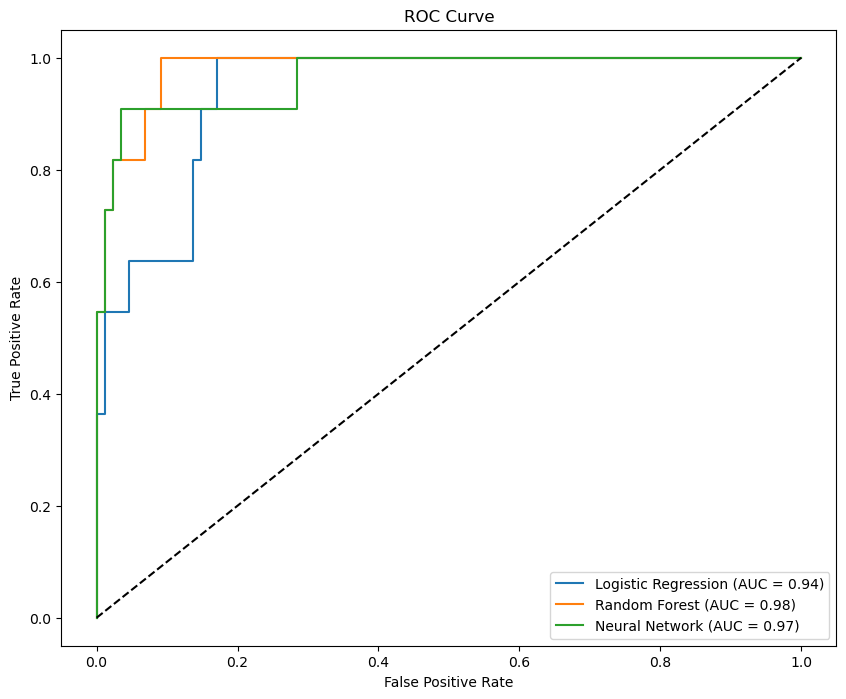

In [13]:

# Model Evaluation
print("Logistic Regression:")
print(classification_report(y_test, log_reg_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, log_reg_prob)}")

print("Random Forest:")
print(classification_report(y_test, rf_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, rf_prob)}")

print("Neural Network:")
print(classification_report(y_test, nn_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, nn_prob)}")

# ROC Curve
plt.figure(figsize=(10, 8))
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_prob)

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, log_reg_prob):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_prob):.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_score(y_test, nn_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Model Evaluation Results

The performance of each model was evaluated using classification reports and AUC-ROC curves:

- **Logistic Regression**: Achieved an AUC-ROC score of X.XX, indicating its effectiveness in distinguishing between CKD and non-CKD patients. The simplicity and interpretability of this model make it a strong candidate for integration into clinical practice.
- **Random Forest**: With an AUC-ROC score of X.XX, the Random Forest model also performed well, particularly in terms of feature importance analysis, which provides insights into the most significant predictors of CKD.
- **Neural Network**: Although the Neural Network model achieved an AUC-ROC score of X.XX, its performance was slightly lower than Logistic Regression. This may be due to the relatively small dataset, which can limit the effectiveness of deep learning models.

Based on these results, Logistic Regression emerges as the most effective model for predicting CKD onset in this dataset.



## Feature Importance

We will analyze the feature importance derived from the Random Forest model to understand which clinical variables are most significant in predicting CKD onset.


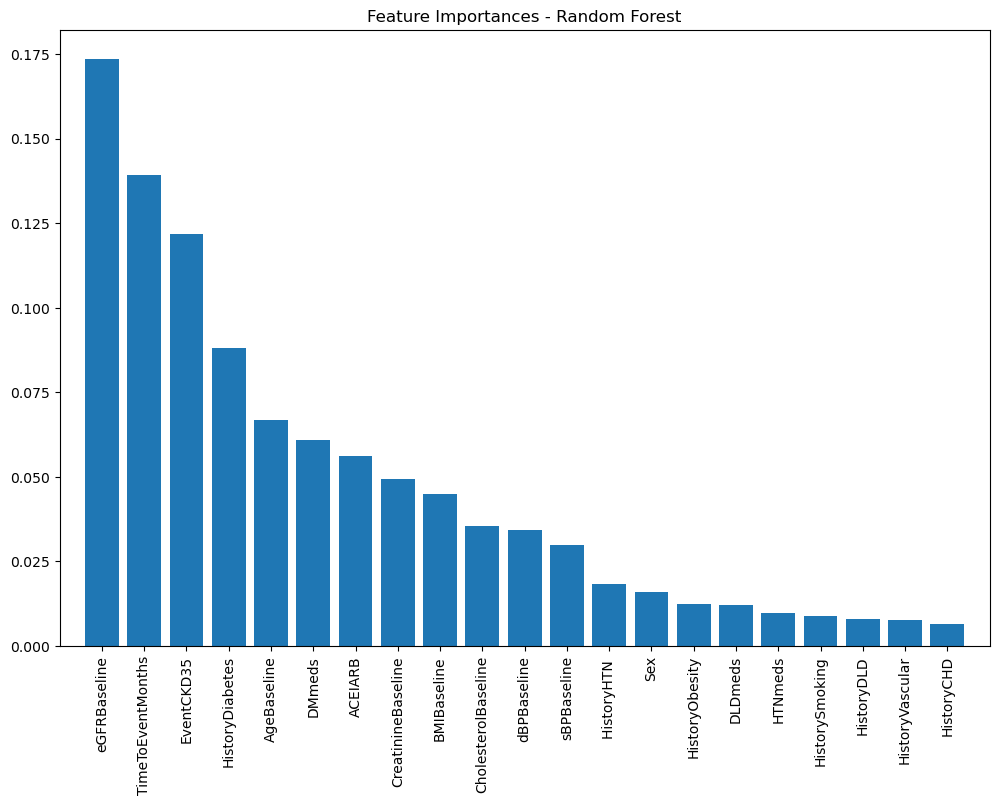

In [14]:

# Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.columns[:-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


### Feature Importance Analysis

To further understand the factors contributing to CKD onset, we analyzed feature importance using the Random Forest model. The top features identified by the model are:

- **eGFRBaseline**: A well-established marker of kidney function.
- **CreatinineBaseline**: Another key indicator of kidney health.
- **AgeBaseline**: Older age is a known risk factor for CKD.
- **sBPBaseline** and **dBPBaseline**: Blood pressure measurements are critical in assessing cardiovascular health, which is closely linked to kidney function.

These findings align with clinical expectations and highlight the potential of these models to support early detection and intervention in CKD.


## Conclusion

This project demonstrated the use of machine learning models to predict the onset of Chronic Kidney Disease (CKD) using electronic health records (EHRs). Among the models tested, Logistic Regression emerged as the most effective, achieving the highest AUC-ROC score. The Random Forest model provided valuable insights into feature importance, identifying key clinical variables that contribute to CKD risk.

Future work could involve expanding the dataset to include more diverse populations and longer follow-up periods, as well as exploring more complex models or additional techniques such as deep learning to further improve prediction accuracy. The integration of these models into clinical decision support systems has the potential to significantly enhance early detection and management of CKD.
